In [1]:
# Importing all the required Libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


Using TensorFlow backend.


In [2]:
#Updating the working directory to import dataset
os.chdir(r'E:\Data Science(Edwisor)\Project\Project #3\Deep Learning Dataset - Cat vs Dog Classifier\dog-cat-full-dataset-master\data')

In [3]:
# Importing the dataset from the directory
train_dir = pathlib.Path('train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 20000 files belonging to 2 classes.


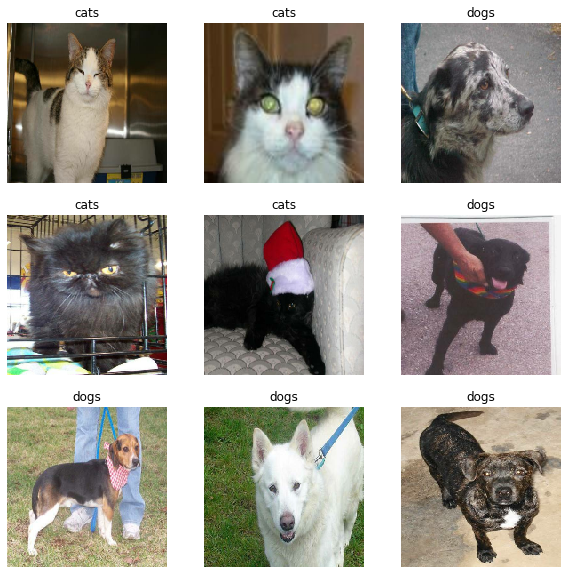

In [4]:
#Looking at few samples from the dataset by plotting them
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
# To avoid overfitting we'll be applying some augmentation to images
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


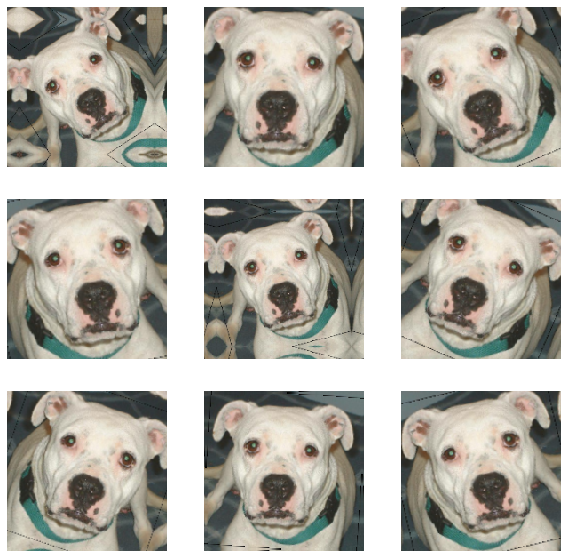

In [6]:
#Looking at the augmentation how they will look like by plotting them
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(10):
      for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Image Preprocessing

In [7]:
#Importing the dataset and Applying the augmentations for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

training_data =train_datagen.flow_from_directory(
    'train',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
    ) 

Found 20000 images belonging to 2 classes.


In [8]:
#Importing the dataset test set (No augmentation applied)
test_datagen = ImageDataGenerator(rescale=1./255)

test_data =train_datagen.flow_from_directory(
    'test',
    target_size=(180,180),
    batch_size=32,
    class_mode='binary'
    ) 

Found 5000 images belonging to 2 classes.


# Creating CNN

In [9]:
# Creating a model 
cnn = tf.keras.models.Sequential()

In [10]:
# Adding Conv0lution layer to the model
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation ='relu',input_shape=[180,180,3]))

In [11]:
# Adding A Max Pooling layer to the model
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
#Adding another set of Convolution and Max pooling layer to the model
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
# Adding a flatten layer which will flatten the output and send it to other layers
cnn.add(tf.keras.layers.Flatten())

In [14]:
# Adding fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [15]:
# Adding fully connected layer for giving output
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [16]:
#Compiling the model and defining the parameters
cnn.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [17]:
# Training the model on training set with validation data for 20 epochs
history = cnn.fit(x=training_data,validation_data=test_data,epochs=20)

Epoch 1/20
625/625 [==============================] - 851s 1s/step - loss: 0.6263 - accuracy: 0.6638 - val_loss: 0.5495 - val_accuracy: 0.7242
Epoch 2/20
625/625 [==============================] - 376s 602ms/step - loss: 0.5165 - accuracy: 0.7435 - val_loss: 0.5067 - val_accuracy: 0.7560
Epoch 3/20
625/625 [==============================] - 383s 612ms/step - loss: 0.4737 - accuracy: 0.7736 - val_loss: 0.4686 - val_accuracy: 0.7782
Epoch 4/20
625/625 [==============================] - 383s 612ms/step - loss: 0.4450 - accuracy: 0.7930 - val_loss: 0.4373 - val_accuracy: 0.7984
Epoch 5/20
625/625 [==============================] - 384s 615ms/step - loss: 0.4247 - accuracy: 0.8033 - val_loss: 0.4282 - val_accuracy: 0.7982
Epoch 6/20
625/625 [==============================] - 383s 612ms/step - loss: 0.4042 - accuracy: 0.8159 - val_loss: 0.4189 - val_accuracy: 0.8126
Epoch 7/20
625/625 [==============================] - 382s 611ms/step - loss: 0.3807 - accuracy: 0.8289 - val_loss: 0.4209 - va

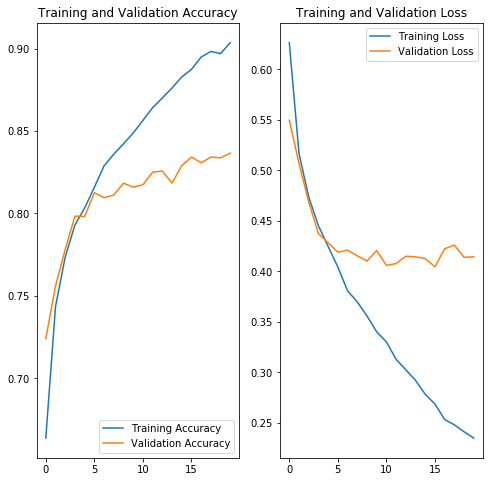

In [18]:
#Plotting the graph for accuracy vs validation accuracy and Loss vs Validation Loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
# Getting the final loss and accuracy of the model
loss_cnn, accuracy_cnn = cnn.evaluate(test_data)
print("final loss: {:.2f}".format(loss_cnn))
print("final accuracy: {:.2f}".format(accuracy_cnn))

157/157 [==============================] - 47s 297ms/step - loss: 0.4335 - accuracy: 0.8252
final loss: 0.43
final accuracy: 0.83


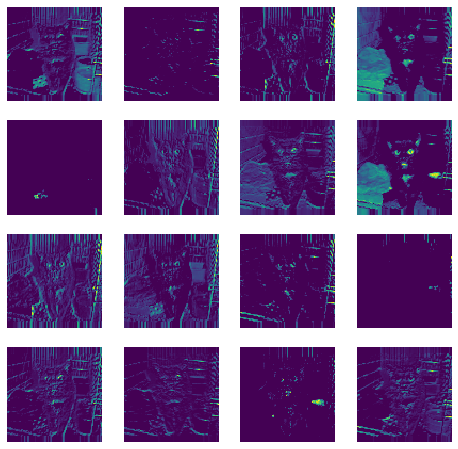

In [20]:
# Getting the output of first convolution layer to see what filters are applied on the dataset
try:
    x = training_data.next()
    layer_outputs = [layer.output for layer in cnn.layers[1:2]]
    activation_model = tf.keras.Model(inputs=cnn.input, outputs=layer_outputs)
    activations = activation_model.predict(x)
except e:
    print(e) #avoid any errors

n = activations.shape[-1]

fig=plt.figure(figsize=(8, 8))
rows = 4
columns = n//rows
for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(activations[0, :, :, i])
    plt.axis('off')

# Image Classification using Transfer Learning

In [21]:
#Importing the MobileNetV2 Pre Trained model for our transfer learning
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [22]:
#Defining the image size as MobileNetV2 input size 
image_size = [160,160]

In [23]:
#Creating an object of model with predefined weights and discarding the output layer
mobnet = MobileNetV2( input_shape = image_size+[3], weights='imagenet',include_top=False)

In [24]:
#Setting the layers to untrainable as they are pre trained
for layer in mobnet.layers:
    layer.trainable= False

In [25]:
#Creating the last layers for the model
last_layer =tf.keras.layers.Flatten()(mobnet.output)

In [26]:
#Creating output layer for the model
output_layer = tf.keras.layers.Dense(units=1,activation='sigmoid')(last_layer)

In [27]:
#Final model with MobentV2 layer and  Output layer which is defined by us
model = tf.keras.Model(inputs= mobnet.input, outputs=output_layer)

In [28]:
#Looking at summary to see trainable and non- trainable parameters
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [29]:
#Compiling the model
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [30]:
#Importing the dataset with Augmentation and New image size for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

training_data =train_datagen.flow_from_directory(
    'train',
    target_size=(160,160),
    batch_size=32,
    class_mode='binary'
    ) 

Found 20000 images belonging to 2 classes.


In [31]:
#Importing the dataset without Augmentation and New image size for test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_data =train_datagen.flow_from_directory(
    'test',
    target_size=(160,160),
    batch_size=32,
    class_mode='binary'
    ) 

Found 5000 images belonging to 2 classes.


In [32]:
#Evaluating the model As it is pre trained
initial_epochs = 10

loss0, accuracy0 = model.evaluate(test_data)

157/157 [==============================] - 68s 433ms/step - loss: 0.8335 - accuracy: 0.5624


In [33]:
#Getting the initial values of loss and accuracy
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.83
initial accuracy: 0.56


In [34]:
#Training the Model for 10 epochs
history_transfer = model.fit(x=training_data,validation_data=test_data,epochs=10)

Epoch 1/10
625/625 [==============================] - 364s 583ms/step - loss: 0.2913 - accuracy: 0.9546 - val_loss: 0.4609 - val_accuracy: 0.9466
Epoch 2/10
625/625 [==============================] - 374s 598ms/step - loss: 0.2756 - accuracy: 0.9668 - val_loss: 0.3884 - val_accuracy: 0.9578
Epoch 3/10
625/625 [==============================] - 361s 577ms/step - loss: 0.2607 - accuracy: 0.9689 - val_loss: 0.3676 - val_accuracy: 0.9648
Epoch 4/10
625/625 [==============================] - 361s 578ms/step - loss: 0.2039 - accuracy: 0.9759 - val_loss: 0.3341 - val_accuracy: 0.9652
Epoch 5/10
625/625 [==============================] - 363s 580ms/step - loss: 0.2078 - accuracy: 0.9760 - val_loss: 0.4482 - val_accuracy: 0.9636
Epoch 6/10
625/625 [==============================] - 365s 585ms/step - loss: 0.2218 - accuracy: 0.9751 - val_loss: 0.5165 - val_accuracy: 0.9574
Epoch 7/10
625/625 [==============================] - 362s 579ms/step - loss: 0.2127 - accuracy: 0.9787 - val_loss: 0.4993 -

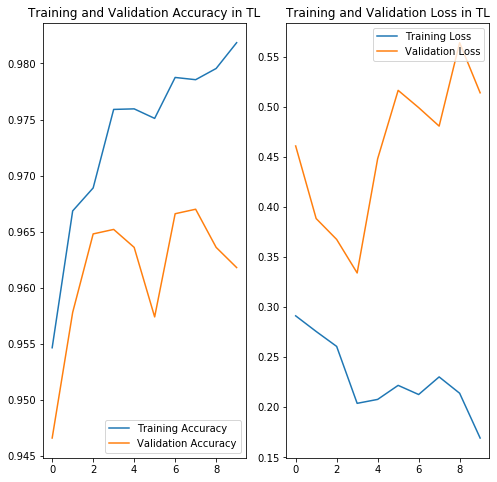

In [35]:
#Plotting the graph for accuracy vs validation accuracy and Loss vs Validation Loss fro transfer learning
acc = history_transfer.history['accuracy']
val_acc = history_transfer.history['val_accuracy']

loss = history_transfer.history['loss']
val_loss = history_transfer.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy in TL')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss in TL')
plt.show()

In [36]:
#Getting the final Accuracy and loss
loss0, accuracy0 = model.evaluate(test_data)
print("final loss: {:.2f}".format(loss0))
print("final accuracy: {:.2f}".format(accuracy0))

157/157 [==============================] - 72s 461ms/step - loss: 0.5226 - accuracy: 0.9642
final loss: 0.52
final accuracy: 0.96


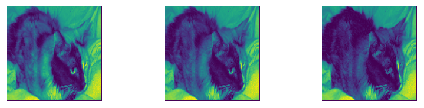

In [37]:
# Getting the output of first convolution layer to see what filters are applied on the dataset in transfer learning
try:
    x = training_data.next()
    layer_outputs = [layer.output for layer in model.layers[1:2]]
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(x)
except:
    pass #avoid any errors

n = activations.shape[-1]

fig=plt.figure(figsize=(8, 8))
rows = 4
columns = 3
for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(activations[0, :, :, i])
    plt.axis('off')

# Image Classification using AutoEncoders

In [38]:
#Creating an auto encoder which will try to reproduce the image which is feeded to it

# ENCODER
input_img = tf.keras.layers.Input(shape=(64, 64, 3))  
x = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# LATENT SPACE
latentSize = (8,8,32)

# DECODER
direct_input = tf.keras.layers.Input(shape=latentSize)
x = tf.keras.layers.Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# COMPILE
encoder = tf.keras.Model(input_img, encoded)
decoder = tf.keras.Model(direct_input, decoded)
autoencoder = tf.keras.Model(input_img, decoder(encoded))

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [39]:
# Importing the dataset for Autoencoder with Augmentations applied
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

training_data =train_datagen.flow_from_directory(
    'train',
    target_size=(64,64),
    shuffle=True,
    batch_size=32,
    class_mode='input'
    ) 

Found 20000 images belonging to 2 classes.


In [40]:
#Importing the test set for validations
test_datagen = ImageDataGenerator(rescale=1./255)

test_data =train_datagen.flow_from_directory(
    'test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
    ) 

Found 5000 images belonging to 2 classes.


In [41]:
#Training the Autoencoder to reproduce images as close to orignal as possible
BATCH_SIZE = 256
EPOCHS = 20
history = autoencoder.fit(training_data,
        steps_per_epoch = training_data.samples // BATCH_SIZE,
        epochs = EPOCHS, verbose=2)

Epoch 1/20
78/78 - 92s - loss: 0.6100
Epoch 2/20
78/78 - 92s - loss: 0.5708
Epoch 3/20
78/78 - 93s - loss: 0.5624
Epoch 4/20
78/78 - 96s - loss: 0.5641
Epoch 5/20
78/78 - 93s - loss: 0.5616
Epoch 6/20
78/78 - 91s - loss: 0.5609
Epoch 7/20
78/78 - 92s - loss: 0.5582
Epoch 8/20
78/78 - 93s - loss: 0.5608
Epoch 9/20
78/78 - 92s - loss: 0.5562
Epoch 10/20
78/78 - 93s - loss: 0.5574
Epoch 11/20
78/78 - 92s - loss: 0.5594
Epoch 12/20
78/78 - 92s - loss: 0.5572
Epoch 13/20
78/78 - 92s - loss: 0.5556
Epoch 14/20
78/78 - 92s - loss: 0.5550
Epoch 15/20
78/78 - 92s - loss: 0.5535
Epoch 16/20
78/78 - 92s - loss: 0.5520
Epoch 17/20
78/78 - 92s - loss: 0.5522
Epoch 18/20
78/78 - 92s - loss: 0.5536
Epoch 19/20
78/78 - 91s - loss: 0.5541
Epoch 20/20
78/78 - 92s - loss: 0.5548


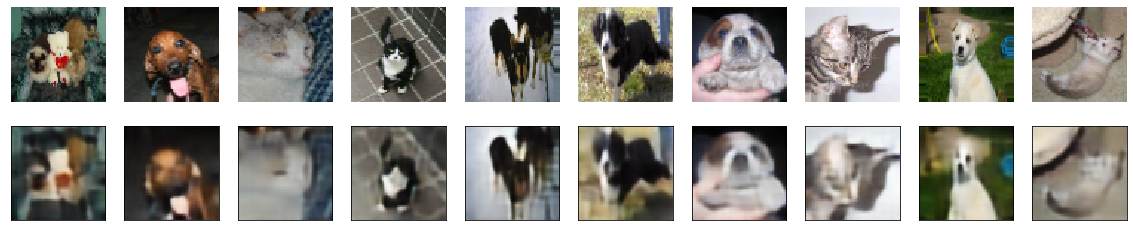

In [42]:
#Checking the output of trained model to verify the images are similar or not
n = 10
x = training_data.next()
decoded_imgs = autoencoder.predict(x)


plt.figure(figsize=(20, 4))
for i in range(n):
#     # display original
    ax = plt.subplot(2, n, i+1)
    image = x[0][i]
    plt.imshow(image.reshape(64, 64, 3)) #RGB image
    ax.axis('off')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(decoded_imgs[i].reshape(64, 64, 3))#RGB image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

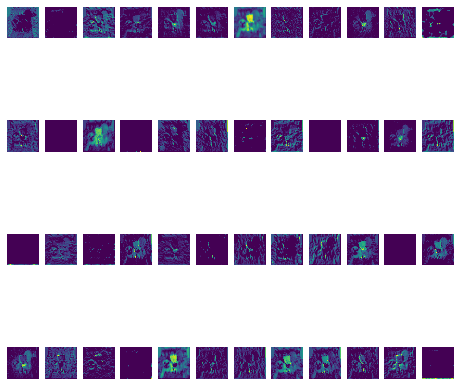

In [43]:
#visualizing activations of autoencoder to see filters applied

try:
    layer_outputs = [layer.output for layer in autoencoder.layers[1:2]]
    activation_model = tf.keras.Model(inputs=autoencoder.input, outputs=layer_outputs)
    activations = activation_model.predict(x)
except:
    pass #avoid any errors

n = activations.shape[-1]

fig=plt.figure(figsize=(8, 8))
rows = 4
columns = n//rows
for i in range(n):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(activations[0, :, :, i])
    plt.axis('off')

In [44]:
#Now we will use the same encoder and a new fully connected layer for the model

#same encoder part
input_img = tf.keras.layers.Input(shape=(64, 64, 3))  
x = tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = tf.keras.layers.Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# fully connected layer with output
model = tf.keras.layers.Flatten()(encoded)
model = tf.keras.layers.Dense(units=128,activation='relu')(model)
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(1,activation='sigmoid')(model) #output

full_model = tf.keras.Model(input_img, model)

In [45]:
# copy encoder-model weights for new model as it is already trained for important features

for l1,l2 in zip(full_model.layers[:8],autoencoder.layers[0:8]):
    l1.set_weights(l2.get_weights())

In [46]:
#freezing the encoder layer as we don't want to train it again

for layer in full_model.layers[0:8]:
    layer.trainable = False

In [47]:
# Complining the model
full_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [48]:
# Getting the summary of model to check for trainable and non-trainable parameters
full_model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 48)        1344      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 192)       

In [49]:
#Importing the dataset again with different class mode as now we need labels of images
training_data =train_datagen.flow_from_directory(
    'train',
    target_size=(64,64),
    shuffle=True,
    batch_size=32,
    class_mode='binary'
    ) 

Found 20000 images belonging to 2 classes.


In [50]:
#Training the model for 20 epochs
hist_auto_full = full_model.fit(training_data,epochs=20,validation_data=test_data)

Epoch 1/20
625/625 [==============================] - 104s 166ms/step - loss: 0.6428 - accuracy: 0.6560 - val_loss: 0.5847 - val_accuracy: 0.6814
Epoch 2/20
625/625 [==============================] - 102s 164ms/step - loss: 0.5791 - accuracy: 0.7024 - val_loss: 0.5610 - val_accuracy: 0.7078
Epoch 3/20
625/625 [==============================] - 104s 166ms/step - loss: 0.5692 - accuracy: 0.7071 - val_loss: 0.5591 - val_accuracy: 0.7190
Epoch 4/20
625/625 [==============================] - 104s 166ms/step - loss: 0.5679 - accuracy: 0.7125 - val_loss: 0.5780 - val_accuracy: 0.7056
Epoch 5/20
625/625 [==============================] - 100s 160ms/step - loss: 0.5646 - accuracy: 0.7117 - val_loss: 0.5713 - val_accuracy: 0.7026
Epoch 6/20
625/625 [==============================] - 110s 176ms/step - loss: 0.5660 - accuracy: 0.7140 - val_loss: 0.5649 - val_accuracy: 0.7002
Epoch 7/20
625/625 [==============================] - 106s 170ms/step - loss: 0.5629 - accuracy: 0.7133 - val_loss: 0.5421 -

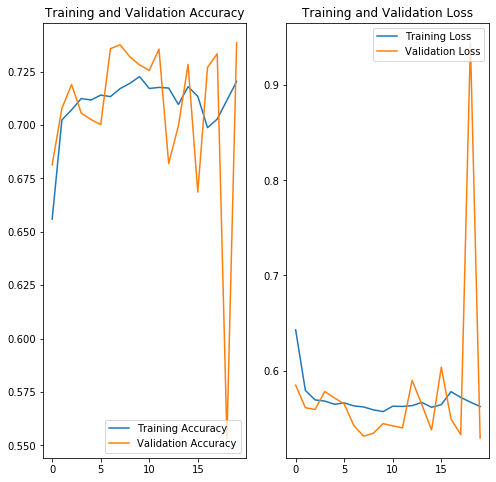

In [51]:
#Plotting the graph Accuracy vs Validation Accuracy and Loss vs Validation accuracy for auto encoder model
acc = hist_auto_full.history['accuracy']
val_acc = hist_auto_full.history['val_accuracy']

loss = hist_auto_full.history['loss']
val_loss = hist_auto_full.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
#Getting the final accuracy and Loss for the mdoel
loss0, accuracy0 = full_model.evaluate(test_data)
print("final loss: {:.2f}".format(loss0))
print("final accuracy: {:.2f}".format(accuracy0))

157/157 [==============================] - 20s 130ms/step - loss: 0.5303 - accuracy: 0.7378
final loss: 0.53
final accuracy: 0.74
